In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
df=pd.read_csv('/mnt/nvme2tb/ffp/results/bestmodels/test/hypres_tf_ns_ncv_2019_all_test_2.csv')

In [3]:
df.columns

Index(['Model ID', 'opt. metric', 'training set', 'test set', 'accuracy train',
       'precision 1 train', 'recall 1 train', 'f1-score 1 train',
       'precision 0 train', 'recall 0 train', 'f1-score 0 train', 'auc train',
       'TN train', 'FP train', 'FN train', 'TP train', 'accuracy test',
       'precision 1 test', 'recall 1 test', 'f1-score 1 test',
       'precision 0 test', 'recall 0 test', 'f1-score 0 test', 'auc test',
       'TN test', 'FP test', 'FN test', 'TP test', 'FN01 test', 'FN02 test',
       'FN001 test', 'FN002 test', 'early stop epochs', 'params',
       'CV Fit and predict min.'],
      dtype='object')

In [4]:
dffilt=df[['Model ID', 'opt. metric', 'test set', 'recall 1 test', 'recall 0 test', 'params' ]]

In [5]:
dffilt[dffilt['test set'].str.contains('all')]

,Model ID,opt. metric,test set,recall 1 test,recall 0 test,params
4,923,hybrid5 test,all set,0.898331,0.787437,"{'ES_mindelta': 0.002, 'ES_monitor': 'val_loss..."
9,875,hybrid5 test,all set,0.904401,0.773437,"{'ES_mindelta': 0.002, 'ES_monitor': 'val_loss..."
14,555,hybrid5 test,all set,0.908953,0.771941,"{'ES_mindelta': 0.002, 'ES_monitor': 'val_loss..."
19,786,NH10 test,all set,0.936267,0.753004,"{'ES_mindelta': 0.002, 'ES_monitor': 'val_loss..."
24,379,NH10 test,all set,0.948407,0.714011,"{'ES_mindelta': 0.002, 'ES_monitor': 'val_loss..."
29,137,NH10 test,all set,0.966616,0.681698,"{'ES_mindelta': 0.002, 'ES_monitor': 'val_loss..."
34,785,hybrid2 test,all set,0.886191,0.811678,"{'ES_mindelta': 0.002, 'ES_monitor': 'val_loss..."
39,366,hybrid2 test,all set,0.852807,0.832309,"{'ES_mindelta': 0.002, 'ES_monitor': 'val_loss..."
44,686,hybrid2 test,all set,0.895296,0.793061,"{'ES_mindelta': 0.002, 'ES_monitor': 'val_loss..."


In [42]:
dfscs=[]
dfscs2=[]
for i in range(6,10):
    dftemp=pd.read_csv('/mnt/nvme2tb/ffp/results/bestmodels/test/hypres_tf_ns_ncv_2019_scores_hybrid2test_1_20190%ddf_normcsv.csv'%i)
    dftemp=dftemp[['y','1']]
    dfscs+=[dftemp]
    if i>6:
        dfscs2+=[dftemp]
    
    

In [43]:
def getbin(distrib, percent, hist, binedges):
    binedges1=binedges[:-1] # match histogram array
    numelements=int(len(distrib)*percent)+1 # compute number of elements for cut off likelihood
    binlim=binedges1[np.cumsum(hist)<numelements][-1] # get cut off likelihood
    return binlim

In [44]:
dfsc=pd.concat(dfscs)

In [46]:
dfsc789=pd.concat(dfscs2)

In [47]:
plotfiredistrib=dfsc[dfsc['y']==1]['1'].values
plotalldistrib=dfsc['1'].values

In [48]:
binedges=be
hist=h
binedges1=binedges[:-1] # match histogram array
distrib=plotfiredistrib
percent=0.005
numelements=int(len(distrib)*percent)+1 # compute number of elements for cut off likelihood
binlim=binedges1[np.cumsum(hist)<numelements][-1] # get cut off likelihood
binlim

0.052360608171

In [36]:
getbin(plotfiredistrib, 0, h, be)

IndexError: index -1 is out of bounds for axis 0 with size 0

In [49]:
firepercents=[0.005,0.05,0.20,0.55]
h, be = np.histogram(plotfiredistrib, bins=1000)
binscust=[]
for fp in firepercents:
    binscust+=[getbin(plotfiredistrib, fp, h, be)]
binscust=[0]+binscust+[1]
    

In [50]:
fpcs=[]
fpcs.append(firepercents[0])
for fpi in range(1,len(firepercents)):
    fpcs.append(firepercents[fpi]-firepercents[fpi-1])
fpcs.append(1-firepercents[-1])
fpcs

[0.005,
 0.045000000000000005,
 0.15000000000000002,
 0.35000000000000003,
 0.44999999999999996]

In [39]:
binscust

[0,
 0.052360608171,
 0.27639974118099997,
 0.6747997646639999,
 0.8920203153649999,
 1]

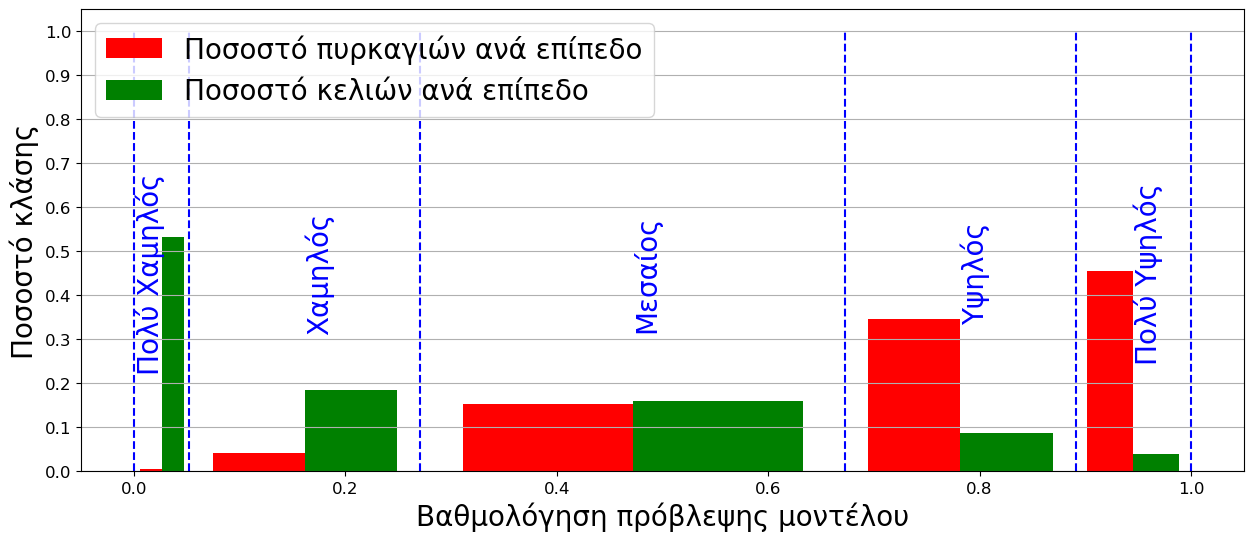

In [57]:
plotfiredistrib=dfsc789[dfsc789['y']==1]['1'].values
plotalldistrib=dfsc789['1'].values

plotfiredistrib=dfsc[dfsc['y']==1]['1'].values
plotalldistrib=dfsc['1'].values

fig1, ax1 = plt.subplots(1, 1, figsize=(15,6))
fsize=20
#ax1.title.set_text('Distribution of ypred')
h50, be50 = np.histogram(plotfiredistrib, bins=50)
hcustf, becustf = np.histogram(plotfiredistrib, bins=binscust)
hcustnf, becustnf = np.histogram(plotalldistrib, bins=binscust)
#ax1.hist(plotalldistrib, bins=100)
#ax1.hist(plotfiredistrib, bins=50, weights=np.ones(len(plotfiredistrib)) / len(plotfiredistrib))
#ax1.plot(be50[1:],np.cumsum(h50)/sum(h50),label="Cumul.Prob.Distrib. of model's pred. 'fire' class", linewidth=3)
#ax1.plot(be50[:-1],h50/sum(h50),label="Prob. Distribution of model's prediction for 'fire'", linewidth=3)
#ax1.plot(becustf[1:],np.cumsum(hcustf)/sum(hcustf),label="Cumul.Prob.Distrib. of Risk Level for 'fire' class",marker='o', linewidth=3)
#ax1.plot(becustnf[:-1],np.cumsum(hcustnf)/sum(hcustnf),label='Level pred. vs all rate',marker='o')
#ax1.plot(be50[:-1],be50[1:],linestyle='--', color='black', label='Ideal Probability match')
#ax1.set_xlabel('Prediction score', fontsize=fsize)
ax1.yaxis.set_ticks(np.linspace(0,1, 11).astype(float))
ax1.grid(axis='y')
ax1.set_xlabel('Βαθμολόγηση πρόβλεψης μοντέλου', fontsize=fsize)
ax1.set_ylabel('Ποσοστό κλάσης', fontsize=fsize)
ax1.tick_params(axis='both', labelsize=12)

#ax2=ax1.twinx()
#ax2.set_ylabel('Times x Cond. Prob. of fire given level 1')
#ax2.set_yscale('log')
#ax2.plot(becustf[:-1],pfrate,label='Cond. Prob. of fire given level (right y axis)',color='purple')

colors1 = ['red', 'darkorange','yellow', 'green', 'blue']
colors2 = ['tomato', 'orange','gold', 'lightgreen', 'lightblue']

#.reverse()

#colors
N, bins, patches = ax1.hist([plotfiredistrib,plotalldistrib], bins=binscust,
                             weights=[np.ones(len(plotfiredistrib)) / len(plotfiredistrib), 
                                      np.ones(len(plotalldistrib)) / len(plotalldistrib)], color=['red', 'green'],
                            label=['Ποσοστό πυρκαγιών ανά επίπεδο', 'Ποσοστό κελιών ανά επίπεδο'])
                           #label=['Actual "Fire" rate per risk level', 'All cells rate per risk level'])


#labels = [w.get_text() for w in ax1.get_xticklabels()]
#locs=list(ax1.get_xticks())
#llabels=['Very Low', 'Low', 'Moderate', 'High', 'Very High']
llabels=['Πολύ Χαμηλός', 'Χαμηλός', 'Μεσαίος', 'Υψηλός', 'Πολύ Υψηλός']
#locs+=binscust[1:]
#ax1.set_xticklabels(labels)
#ax1.set_xticks(locs)

plt.vlines(x=binscust, ymin=0, ymax=1, color = 'b', linestyle='--')

prev=-0.05
for i, x in enumerate(binscust[1:]):
    #print(x, prev, (x-prev)/2 )
    ax1.text(x-(x-prev)/2, 0.45, llabels[i], rotation=90, verticalalignment='center', color='blue', fontsize=fsize)
    prev=x

#lines, labels = ax1.get_legend_handles_labels()
#lines2, labels2 = ax2.get_legend_handles_labels()
#ax2.legend(lines + lines2, labels + labels2, loc='upper left')
ax1.legend(fontsize=fsize, loc='upper left')
#N, bins, patches2 = ax1.hist(plotalldistrib, bins=binscust, weights=np.ones(len(plotalldistrib)) / len(plotalldistrib))
          #alpha=0.7, color=colors, edgecolor='black')

#for patch, color in zip(patches[0], colors1[::-1]):
#    patch.set_facecolor(color)
#for patch, color in zip(patches[1], colors2[::-1]):
#    patch.set_facecolor(color)

#patches
#for i in range(0,5):
#    patches[i].set_facecolor(colors[::-1][i])
#plt.legend()
plt.show()

In [58]:
hcustnf/sum(hcustnf)*100

array([53.13178665, 18.43283512, 15.87617795,  8.58625883,  3.97294145])

In [ ]:
array([50.5644415 , 18.72970714, 16.69105995,  9.40614507,  4.60864634])

In [41]:
be50

array([0.02021586, 0.03969753, 0.05917919, 0.07866085, 0.09814252,
       0.11762418, 0.13710585, 0.15658751, 0.17606917, 0.19555084,
       0.2150325 , 0.23451416, 0.25399583, 0.27347749, 0.29295916,
       0.31244082, 0.33192248, 0.35140415, 0.37088581, 0.39036747,
       0.40984914, 0.4293308 , 0.44881247, 0.46829413, 0.48777579,
       0.50725746, 0.52673912, 0.54622078, 0.56570245, 0.58518411,
       0.60466578, 0.62414744, 0.6436291 , 0.66311077, 0.68259243,
       0.70207409, 0.72155576, 0.74103742, 0.76051909, 0.78000075,
       0.79948241, 0.81896408, 0.83844574, 0.8579274 , 0.87740907,
       0.89689073, 0.9163724 , 0.93585406, 0.95533572, 0.97481739,
       0.99429905])

In [15]:
plotfiredistrib

array([0.18341258, 0.4538933 , 0.8848229 , 0.74888116, 0.67185444,
       0.8983802 , 0.76278883, 0.808925  , 0.26145926, 0.55789256,
       0.5469544 , 0.80818266, 0.5162439 , 0.7931911 , 0.5347061 ,
       0.7921453 , 0.8302173 , 0.85355455, 0.7884016 , 0.56042093,
       0.75936216, 0.7344581 , 0.7494679 , 0.50296885, 0.75750214,
       0.69221216, 0.67282355, 0.6776625 , 0.75349206, 0.6336132 ,
       0.61654305, 0.6541006 , 0.68889654, 0.7113155 , 0.7527121 ,
       0.7274111 , 0.59240127, 0.34476465, 0.64609313, 0.59467995,
       0.63722277, 0.6555028 , 0.64835083, 0.5409329 , 0.32599255,
       0.02613307, 0.7112369 , 0.69408655, 0.52846736, 0.36512277,
       0.5545633 , 0.5098144 , 0.07026715, 0.06109734, 0.07265855,
       0.69914865, 0.6264139 , 0.9277572 , 0.9377277 , 0.9503953 ,
       0.94941163, 0.86915565, 0.9526147 , 0.9571165 , 0.9418731 ,
       0.75129414, 0.8655432 , 0.8952556 , 0.9155083 , 0.76769763,
       0.7577132 , 0.8928909 , 0.90194666, 0.86788476, 0.83393

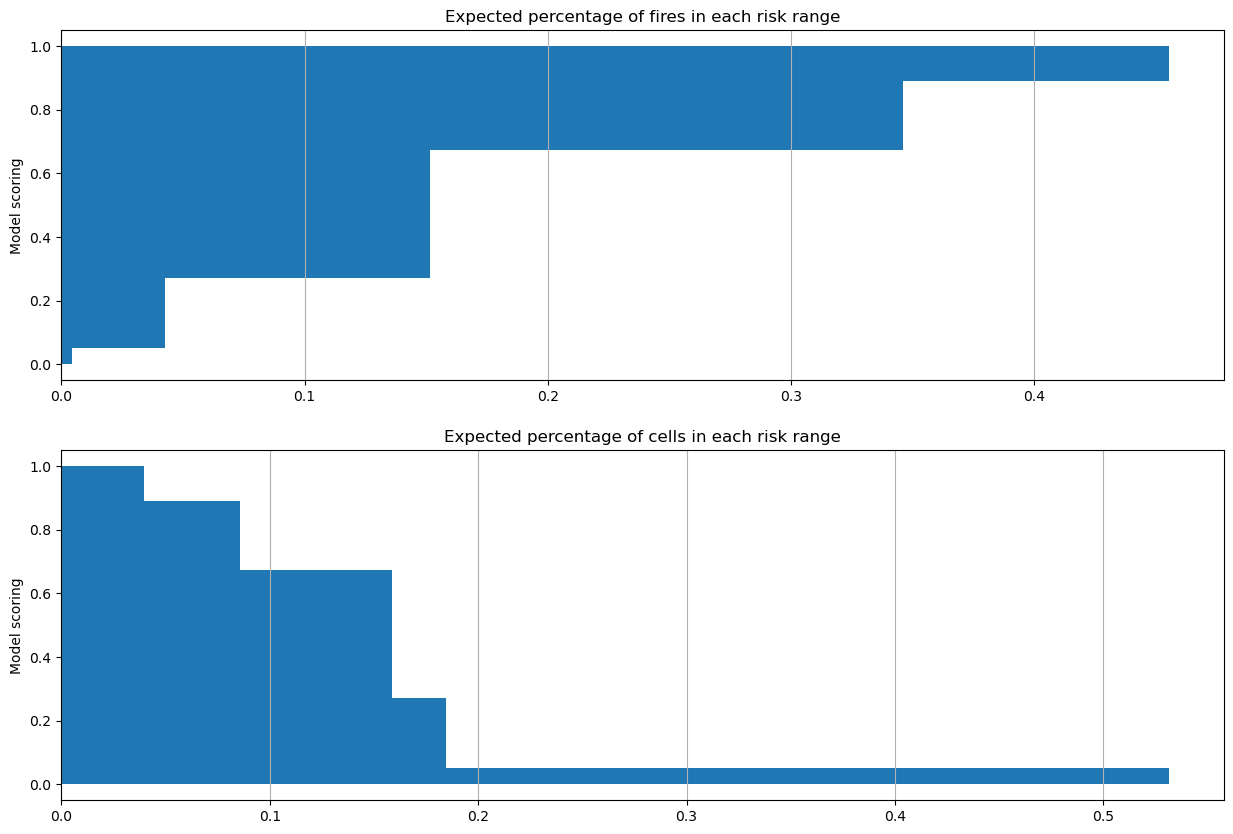

In [14]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
#ax[0].hist(plotfiredistrib, bins=binscust)
ax[0].title.set_text('Expected percentage of fires in each risk range')
ax[0].hist(plotfiredistrib, bins=binscust, weights=np.ones(len(plotfiredistrib)) / len(plotfiredistrib),
          orientation='horizontal')
#ax[2].hist(plotalldistrib, bins=binscust)
ax[1].title.set_text('Expected percentage of cells in each risk range')
ax[1].hist(plotalldistrib, bins=binscust, weights=np.ones(len(plotalldistrib)) / len(plotalldistrib),
          orientation='horizontal')
for i in range(2):
    ax[i].grid(axis='x')
    ax[i].set_ylabel('Model scoring')
    #ax[i].set_xlabel('histogram percent')
plt.show()

In [25]:
hcust, becust = np.histogram(plotalldistrib, bins=binscust)

In [94]:
len(plotalldistrib)

79273280

In [95]:
pab=hcust/len(plotalldistrib)

In [97]:
p1=len(plotfiredistrib)/len(plotalldistrib)

In [26]:
pab

NameError: name 'pab' is not defined

In [101]:
pfire=p1*np.array(fpcs)/pab

In [48]:
9.41583709e-05/7.82301514e-08

1203.60716699316

In [120]:
(pfire*1000000)[5]

IndexError: index 5 is out of bounds for axis 0 with size 5

In [124]:
pfrate=np.zeros(len(pfire))
pfrate[0]=1
for i in range(len(pfire)-1):
    pfrate[i+1]=pfire[i+1]/pfire[0]
pfrate  

array([1.00000000e+00, 2.59420798e+01, 1.00399076e+02, 4.33160139e+02,
       1.20360717e+03])

In [132]:
binscust

[0, 0.052360608171, 0.270555242059, 0.67285159829, 0.8910462321779999, 1]

In [133]:
pfire

array([7.82301514e-08, 2.02945283e-06, 7.85423493e-06, 3.38861833e-05,
       9.41583709e-05])

In [143]:
pfrate

array([1.00000000e+00, 2.59420798e+01, 1.00399076e+02, 4.33160139e+02,
       1.20360717e+03])

In [145]:
hcustnf/sum(hcustnf)

array([0.53131787, 0.18432835, 0.15876178, 0.08586259, 0.03972941])

In [213]:
hcustarb, becustarb = np.histogram(plotfiredistrib, bins=[0,0.2,0.4,0.6,0.8,1])

In [217]:
hcustarb/sum(hcustarb)

array([0.03338392, 0.05462822, 0.06525038, 0.2245827 , 0.62215478])

In [215]:
becustarb

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [218]:
from jenkspy import JenksNaturalBreaks

In [230]:
jnb = JenksNaturalBreaks(5) # Asking for 4 clusters
jnb.fit(plotfiredistrib) # Create the clusters according to values in 'x'

In [221]:
#print(jnb.labels_) # Labels for fitted data
#print(jnb.groups_) # Content of each group
print(jnb.breaks_) # Break values (including min and max)
#print(jnb.inner_breaks_) # Inner breaks (ie breaks_[1:-1])

[0.020215863, 0.28508502, 0.5637383, 0.7713842, 0.9033558, 0.99429905]


In [227]:
hcustnb, becustnb = np.histogram(plotfiredistrib, bins=[0, 0.28508502, 0.5637383, 0.7713842, 0.9033558, 1])

In [228]:
hcustnb/sum(hcustnb)

array([0.05159332, 0.08649469, 0.20030349, 0.24279211, 0.41881639])

In [229]:
sum(hcustarb)

659